In [1]:
import warnings
import itertools #facilitates complex iterations
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm #AUTO ARIMA
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/content/Global Superstore_2011_to_2014.xlsx")


In [3]:
#Finding product contributing highest sales

highest_category_profit = df.groupby(by=['Category']).sum().sort_values(by=['Profit']).reset_index()
highest_category_profit

,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,Furniture,241487920,118196026.0,4.110874e+06,34954,1660.030,285204.72380,440319.4790
1,Office Supplies,815386724,330772872.0,3.787070e+06,108182,4297.190,518473.83430,405448.3450
2,Technology,258483051,102603754.0,4.744557e+06,35176,1372.508,663778.73318,507047.8794


In [4]:
 Office_Supplies= df.loc[df['Category'] == 'Office Supplies']#choosing office supplies category because it has maximum number of records

In [5]:
Office_Supplies['Order Date'].min(), Office_Supplies['Order Date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [6]:
#Detecting null values

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Market','Shipping Cost','Order Priority']
Office_Supplies.drop(cols, axis=1, inplace=True)
Office_Supplies = Office_Supplies.sort_values('Order Date')
Office_Supplies.isnull().sum()

Order Date    0
Sales         0
Profit        0
dtype: int64

In [7]:
#resettig indices

Office_Supplies = Office_Supplies.groupby('Order Date')['Profit'].sum().reset_index()

Indexing with Time Series Data

In [8]:
Office_Supplies = Office_Supplies.set_index('Order Date')
Office_Supplies.index

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09',
               '2011-01-10', '2011-01-11',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1413, freq=None)

In [9]:
#taking monthly averages using resample function

y = Office_Supplies['Profit'].resample('MS').mean()

In [10]:
y['2014':]

Order Date
2014-01-01    309.443735
2014-02-01    266.367448
2014-03-01    346.090661
2014-04-01    347.671331
2014-05-01    467.415906
2014-06-01    540.936243
2014-07-01    383.901883
2014-08-01    806.997167
2014-09-01    725.658587
2014-10-01    630.378030
2014-11-01    748.426050
2014-12-01    411.331242
Freq: MS, Name: Profit, dtype: float64

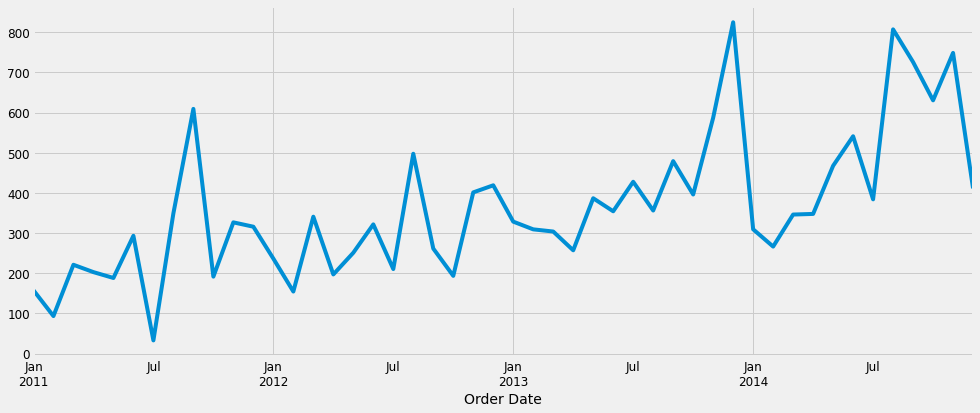

In [11]:
#Plotting actual Profit values from year 2011 to year 2014

y.plot(figsize=(15, 6))
plt.show()

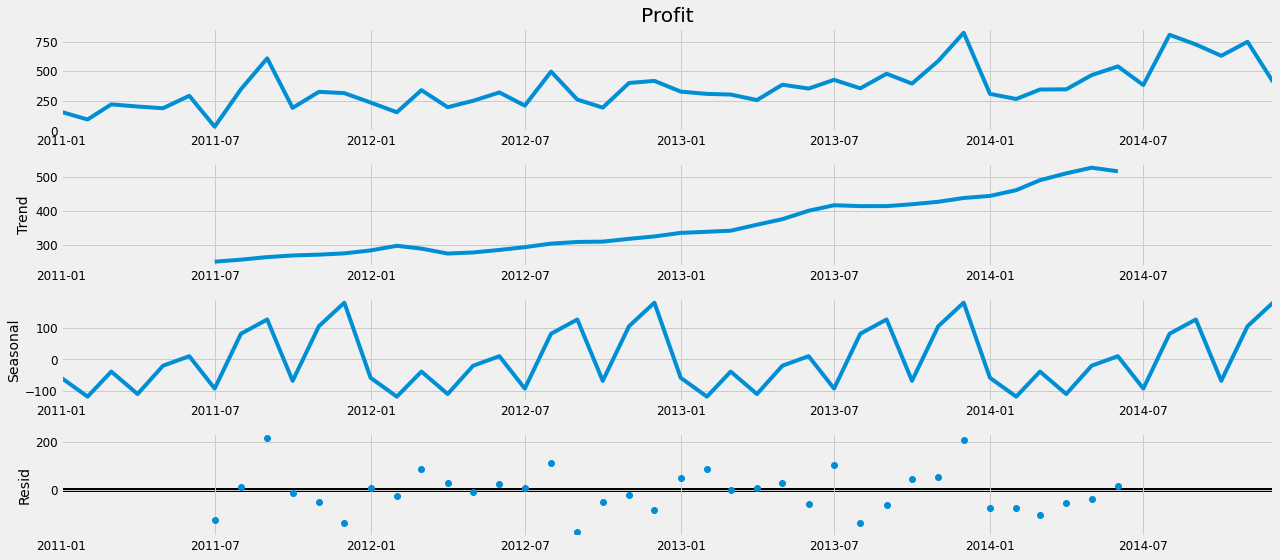

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# **TIME SERIES FORECASTING WITH ARIMA**

**PARAMETER SELECTION FOR MODEL**

In [16]:
#Finding combinations of p,d,q using Grid Search/ Hyperparamater Optimization
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
#Finding the BEST HYPER PARAMETERS (p,d,q)

warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:700.4171441199082
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1249.0738835497039
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:466.70367582277487
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:314.004000246546
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:478.7201228834469
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1109.8779301855557
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:326.7578913382057
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:314.96803011322214
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:648.1341639989648
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2502.215351117536
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:454.93149192025066
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:299.34319841184123
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:480.68827511727403
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2422.271763995035
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:325.1234588567854
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:301.24567212748934
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:611.3505577956948
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1424.6307433758052
AR

**Output: The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 277.4848374409966**

**Fitting the ARIMA model**

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0607      0.137     -7.770      0.000      -1.328      -0.793
ma.S.L12      -1.0000      0.245     -4.074      0.000      -1.481      -0.519
sigma2      1.179e+04   2.08e-05   5.66e+08      0.000    1.18e+04    1.18e+04


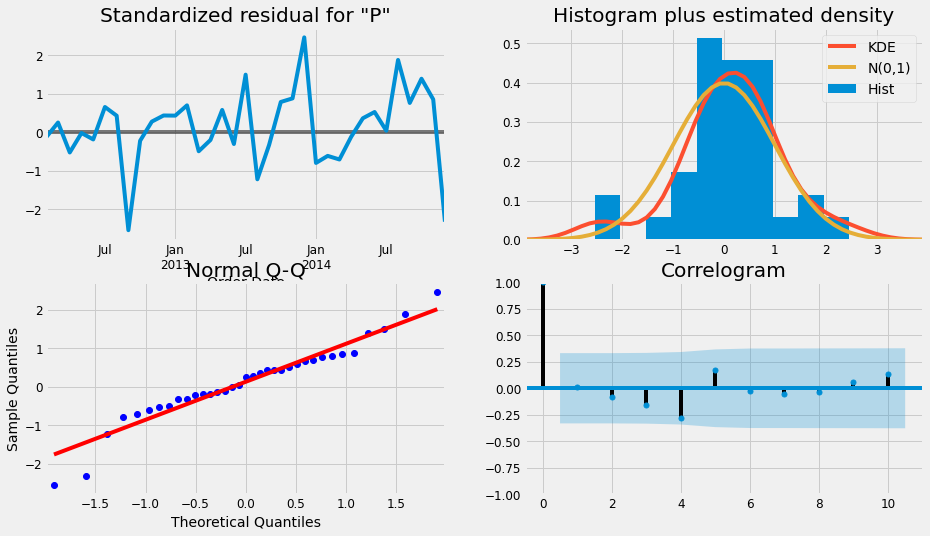

In [19]:
results.plot_diagnostics(figsize=(14, 8))
plt.show()

**Validating forecasts**

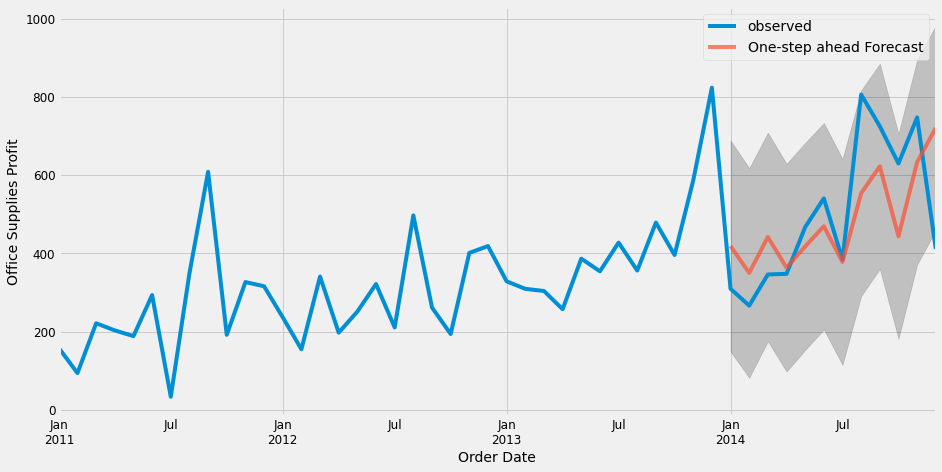

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Validation', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Office Supplies Profit')
plt.legend()

plt.show()

**Calculating Mean squared Error and Root Mean Squared Error**

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21207.25


Our office supplies daily profit ranges from around 180 to 700. Hence this model seems acceptable.

In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 145.63


**Producing and visualizing forecasts**

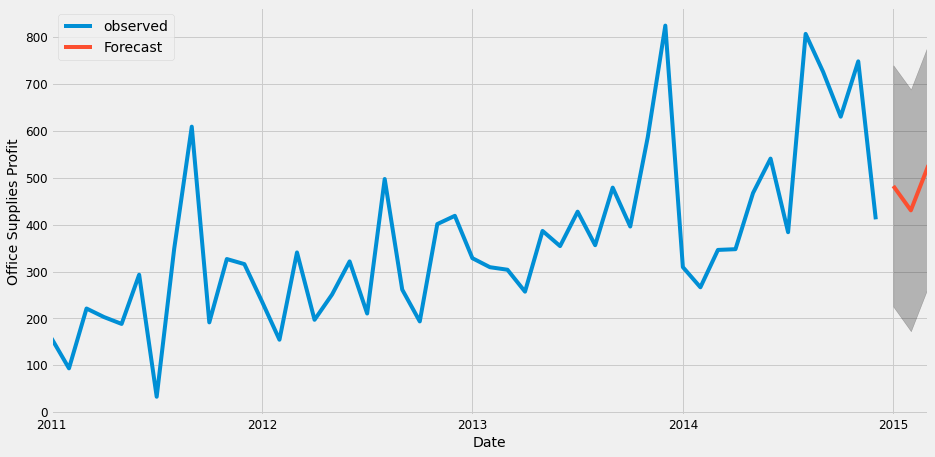

In [23]:
pred_uc = results.get_forecast(steps=3)# next 3 months forecast
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,#confidence intervals 
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Profit')

plt.legend()
plt.show()

As we move further into the future forecasting, the confidence interval generated by our model grow larger.

**Comparison between forecast of Profit earned from Furniture and Office Supplies**

In [24]:
furniture = df.loc[df['Category'] == 'Furniture']
Office_Supplies = df.loc[df['Category'] == 'Office Supplies']

In [25]:
furniture.shape, Office_Supplies.shape

((9876, 24), (31273, 24))

In [26]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount','Market','Shipping Cost','Order Priority']
furniture.drop(cols, axis=1, inplace=True)
Office_Supplies.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
Office_Supplies = Office_Supplies.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Profit'].sum().reset_index()
Office_Supplies = Office_Supplies.groupby('Order Date')['Profit'].sum().reset_index()

In [27]:
furniture.head()

,Order Date,Profit
0,2011-01-01,37.7700
1,2011-01-03,351.2625
2,2011-01-04,616.7200
3,2011-01-05,22.9200
4,2011-01-06,35.6400


In [28]:
Office_Supplies.head()

,Order Date,Profit
0,2011-01-01,161.1030
1,2011-01-03,54.3687
2,2011-01-04,-46.5448
3,2011-01-05,1030.4499
4,2011-01-06,37.7661


**Merging 'furniture_Profit' column and 'office_supplies_Profit' column for comparison**

In [29]:
furniture = furniture.set_index('Order Date')
Office_Supplies = Office_Supplies.set_index('Order Date')

y_furniture = furniture['Profit'].resample('MS').mean()
y_Office_Supplies = Office_Supplies['Profit'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Profit':y_furniture.values})
Office_Supplies = pd.DataFrame({'Order Date': y_Office_Supplies.index, 'Profit': y_Office_Supplies.values})

store = furniture.merge(Office_Supplies, how='inner', on='Order Date')
store.rename(columns={'Profit_x': 'furniture_Profit', 'Profit_y': 'office_supplies_Profit'}, inplace=True)
store.head()

,Order Date,furniture_Profit,office_supplies_Profit
0,2011-01-01,26.584650,157.715107
1,2011-02-01,125.157426,93.447440
2,2011-03-01,203.678658,221.083731
3,2011-04-01,83.421528,202.807089
4,2011-05-01,20.223100,188.240963


Plotting 'furniture_Profit' versus	'office_supplies_Profit' year wise from 2011 to 2014

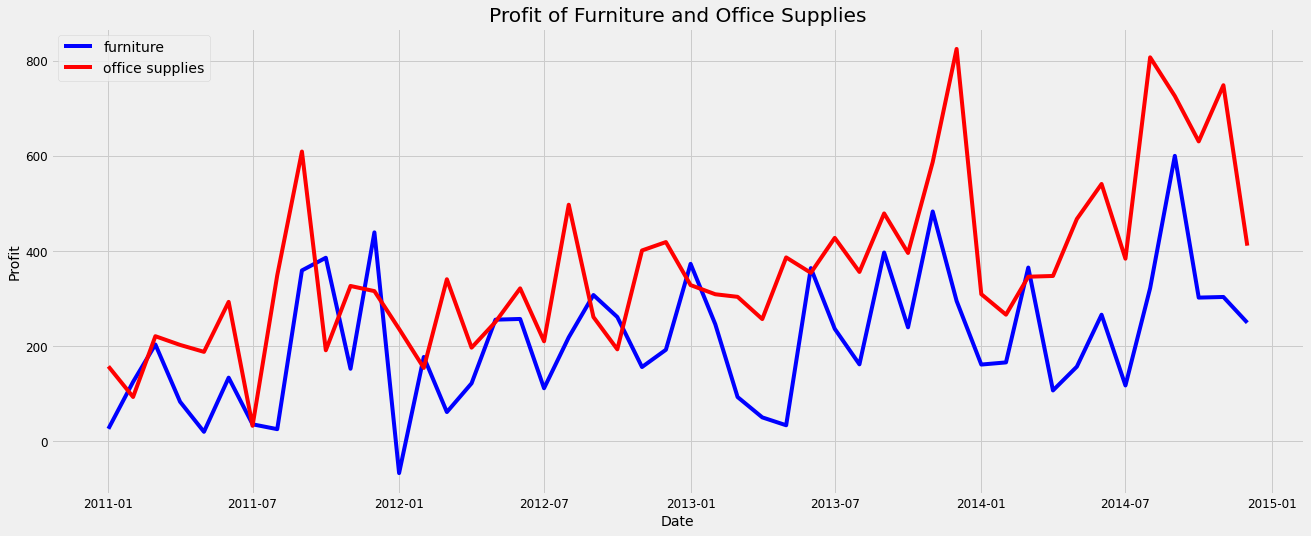

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_Profit'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_supplies_Profit'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Profit'); plt.title('Profit of Furniture and Office Supplies')
plt.legend();

We observe that profit of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily profit for office supplies are higher than those of furniture in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occationaly, office supplies passed furnitue on average daily profit. Let's find out when was the first time office supplies' profit surpassed those of furniture's.

# **TIME SERIES FORECASTING WITH FACEBOOK PROPHET**

In [13]:
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 110 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638294 sha256=0bbe8d89ab2707554f5823f97606202780b85b3a9fe2840cc1e5ab0dfa044ecc
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

**Renaming the order Date column 'ds' and the Profit column as 'y'**

In [31]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Profit': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = Office_Supplies.rename(columns={'Order Date': 'ds', 'Profit': 'y'})
office_model = Prophet(interval_width=0.95)# we can specify the desired range of our uncertainty interval by setting the interval_width parameter
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Making Future Prediction**

In [32]:
#Prophet provides the 'make_future_dataframe' helper function
#Instructing Prophet to create 1 datestamp in the future i.e 1 month (since we have set monthly avergae frequency)
#The DataFrame of future dates is then used as input to the predict method of our fitted model

furniture_forecast = furniture_model.make_future_dataframe(periods=1, freq='MS')#periods = 1 month
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=1, freq='MS')
office_forecast = office_model.predict(office_forecast)

**One month ahead forecast of product Category 'Furniture'**

<Figure size 1296x432 with 0 Axes>

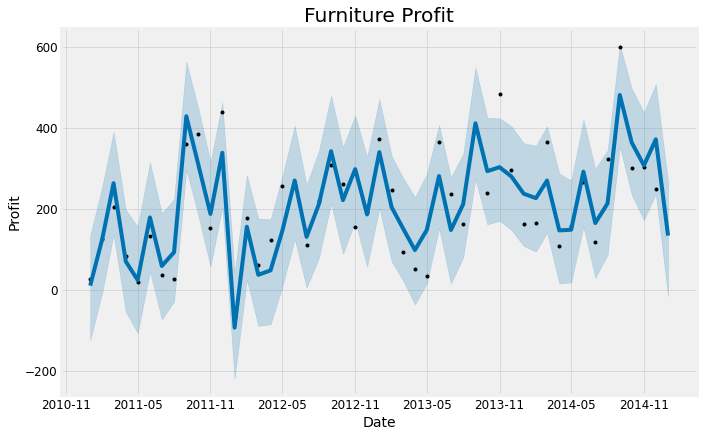

In [33]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Profit')
plt.title('Furniture Profit');

**One month ahead forecast of product Category 'Office Supplies'**

<Figure size 1296x432 with 0 Axes>

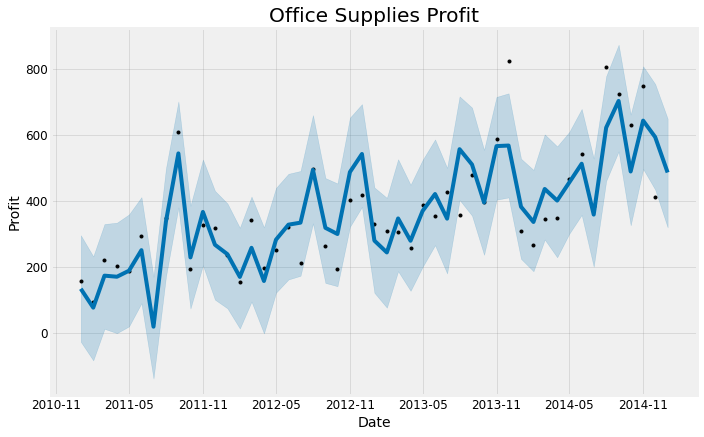

In [34]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Profit')
plt.title('Office Supplies Profit');

**Comparing Forecasts**

In [35]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')

forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
#forecast.head()
forecast.tail()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
44,2014-09-01,222.115676,353.556662,605.621253,222.115676,222.115676,259.356325,259.356325,259.356325,259.356325,...,158.078711,158.078711,158.078711,158.078711,158.078711,158.078711,0.0,0.0,0.0,703.132604
45,2014-10-01,224.654164,234.763806,497.255614,224.654164,224.654164,139.500054,139.500054,139.500054,139.500054,...,-63.462874,-63.462874,-63.462874,-63.462874,-63.462874,-63.462874,0.0,0.0,0.0,488.840693
46,2014-11-01,227.277269,172.621150,438.526706,227.277269,227.277269,80.087685,80.087685,80.087685,80.087685,...,83.519813,83.519813,83.519813,83.519813,83.519813,83.519813,0.0,0.0,0.0,643.314711
47,2014-12-01,229.815758,236.480328,508.410021,229.815758,229.815758,142.165418,142.165418,142.165418,142.165418,...,26.454985,26.454985,26.454985,26.454985,26.454985,26.454985,0.0,0.0,0.0,593.499559
48,2015-01-01,232.438862,-16.178388,267.645003,232.438862,232.438863,-98.476009,-98.476009,-98.476009,-98.476009,...,-88.699319,-88.699319,-88.699319,-88.699319,-88.699319,-88.699319,0.0,0.0,0.0,485.836585


In [36]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  49 non-null     datetime64[ns]
 1   furniture_trend                       49 non-null     float64       
 2   furniture_yhat_lower                  49 non-null     float64       
 3   furniture_yhat_upper                  49 non-null     float64       
 4   furniture_trend_lower                 49 non-null     float64       
 5   furniture_trend_upper                 49 non-null     float64       
 6   furniture_additive_terms              49 non-null     float64       
 7   furniture_additive_terms_lower        49 non-null     float64       
 8   furniture_additive_terms_upper        49 non-null     float64       
 9   furniture_yearly                      49 non-null     float64       
 10  furn

**Plotting forecast based on yhat values**

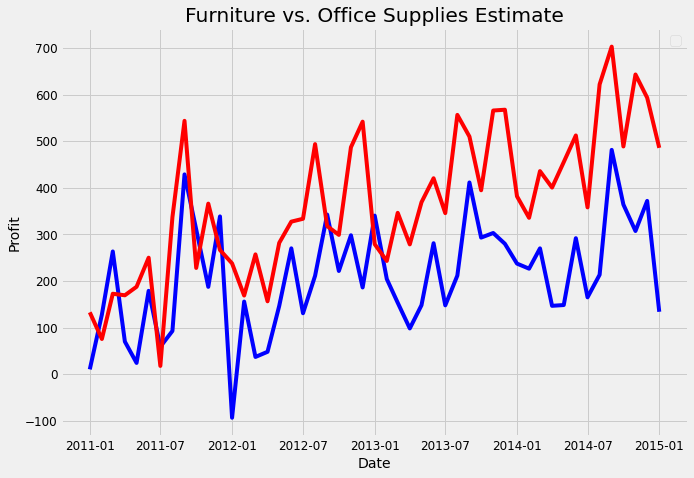

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Profit')
plt.title('Furniture vs. Office Supplies Estimate');


**Plotting forecast values based on trend values**

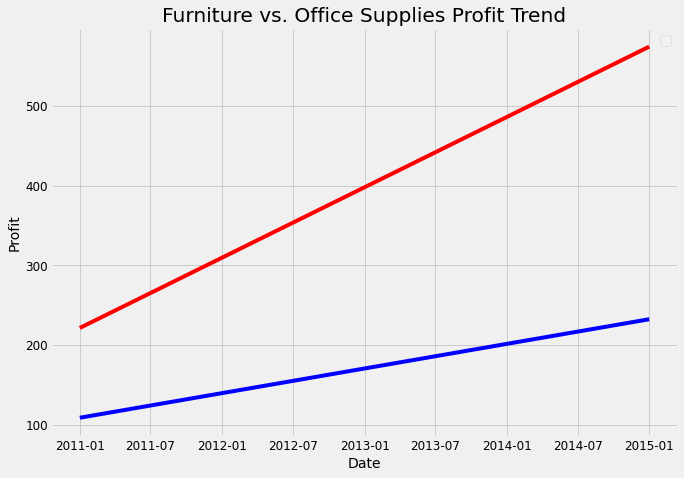

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Profit')
plt.title('Furniture vs. Office Supplies Profit Trend');

**Trends and Patterns**

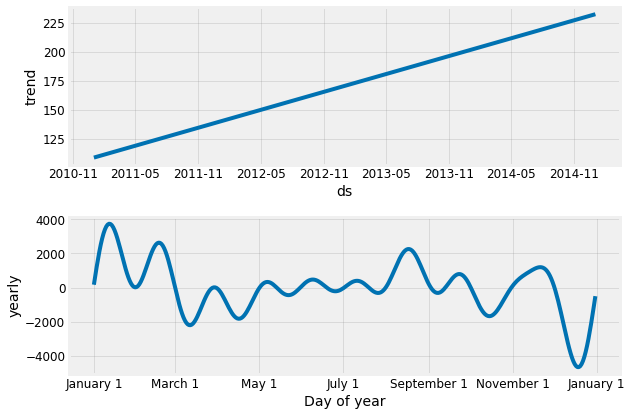

In [40]:
furniture_model.plot_components(furniture_forecast);

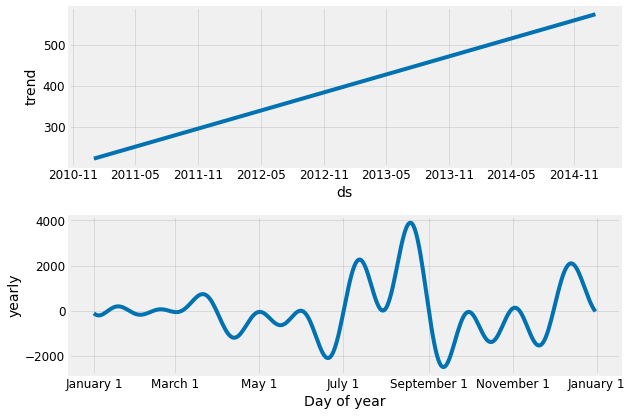

In [41]:
office_model.plot_components(office_forecast);

**The overall trend of Profit from Furniture and Office Supplies is seen linearly increasing over time.**

**The Profit of furniture peaks in the mid of month of January and February and goes down at the end of the year in the month of December.**

**The Profit from Office Supplies category is highest in the months of July and August and goes down in the months of June and September.** 